# Audio Processing

In this guided notebook you will both generate sound waves & analyze `.wav` files on the hard drive.

The goal is to understand how a sound is encoded in numbers, the same way images or videos are, as well as basically anything a computer manipulates. Then we go on with the audio data analysis and extracting necessary features from a sound/audio file.  
  
**Bonus**  building an classifier for the music genre classification. 

<details>
    <summary>üí° <strong>Hint</strong> </summary>
    
Python has a few libraries for audio processin, such as Librosa and PyAudio. Fele free to use them. Librosa has more option for music related task, and it's well [documented](https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html).

</details>

In [54]:
##TODO - I have added a few useful libraries here as a strater, add the other later to the end of this cell
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from IPython.display import Audio
%matplotlib inline

## Sound Synthesis

Before we generate sound from scratch, let's see how the computer records sound from a microphone:

In [57]:
R = 44100 # Sampling rate
D = 5     # Duration of the sound
dt = 1/R

‚ùì Write a `note(f)` function which takes a frequency $f$ (in Hz) and generate a sinusoide signal with sampling rate `R` and duration `D` (constants). Then plot the function.

<details>
    <summary>üí° <strong>Hint</strong> </summary>
    
A single-frequency sound wave with frequency $f$ and maximum amplitude $A$ is represented by the sine function:

$$y(t)=A \times sin(2 \pi f t)$$

where $t$ is time and $y(t)$ is the amplitude of the sound wave at time $t$.

You can consider for now that the maximum amplitude $A$ is `1`.

Remember, you can generate a big list of numbers using [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
</details>

In [55]:
#TODO - function


‚ùì Plot the output of `note(f)` for `440 Hz`. For `1Hz`. What do you see?

In [56]:
#TODO - plotting


‚ùì Call the `note` function to generate an `A` (440 Hz) from the diapason, then play it.

<details>
    <summary>üí° <strong>Hint</strong></summary>

Use [`Audio`](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html) from `IPython.display` already imported in the notebook at the first cell)
</details>

In [ ]:
#TODO - Aduio play

## [Fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform)

> Fourier analysis converts a signal from its original domain (often time or space) to a representation in the frequency domain and vice versa. 
> **Wikipedia**

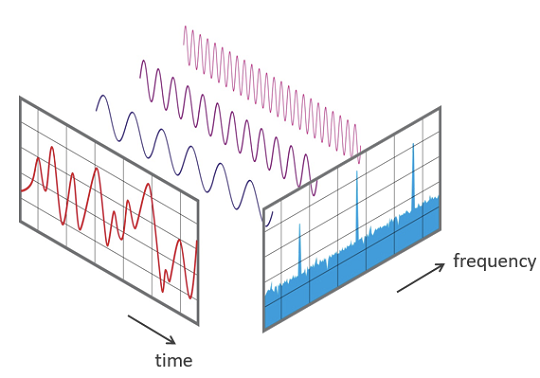

Let's use [`scipy`](https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html) to analyze the signals we built above.

Wrie a `plot_fft` function that recieves 3 inputs: `signal`, `sampling-rate`, and `max-frequency`. And plot the `fft` of your constructed signal.

In [58]:
#TODO - plot_fft funciton

## Real-life samples

Now perform `fft` on the `.wav` files in the task folder:

In [26]:
!ls -lh *.wav

-rw-rw-r-- 1 zohrea zohrea 379K Aug 31 11:10 bell.wav
-rw-rw-r-- 1 zohrea zohrea 506K Aug 31 11:10 bird.wav
-rw-rw-r-- 1 zohrea zohrea 266K Aug 31 11:11 piano_F.wav
-rw-rw-r-- 1 zohrea zohrea 100K Aug 31 11:11 snare_80s.wav


Next, load the audio of `bird.wav`(it should has a `shape` of <129279, 2> ) and visualize the sound **waveform**

In [ ]:
#TODO - load bird.wav

Let's apply and plot the FFT of that signal & play it

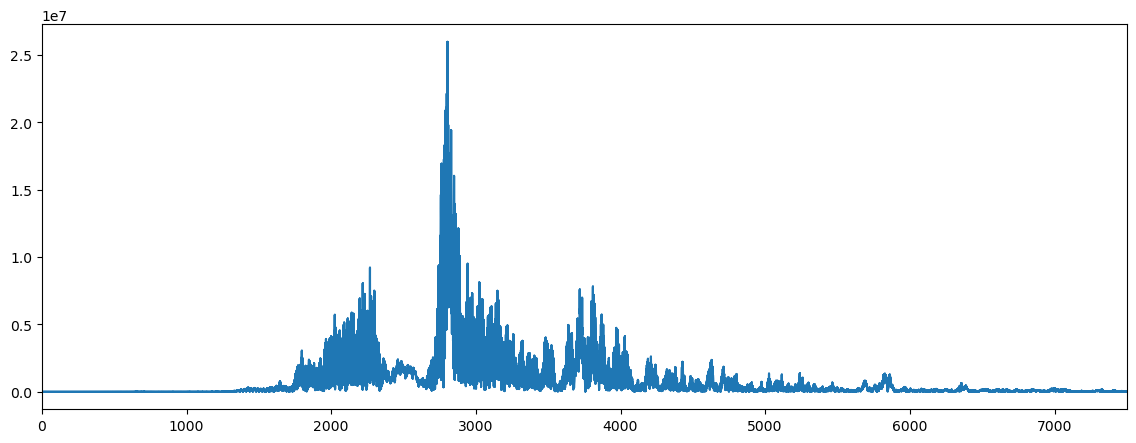

In [28]:
#TODO - dispaly and play the audio

---
## Audio processing with librosa
Awesome! 

‚ùì After this intro, let's dig more into the audio processing.
As the next step, try to load one the `wav` files with librosa. Te output should be an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono. We can change this behavior by resampling at 44.1KHz.

<class 'numpy.ndarray'> <class 'int'>
(59388,) 22050


‚ùì Try to change the sampling rate to 44.1KHz. you may try to play the audio! 

In [30]:
#TODO

(array([ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  8.795398e-08,
        -7.837331e-08,  0.000000e+00], dtype=float32),
 44100)

Instead of using `plot_fft`, use `librosa` modules to display the wav file. 

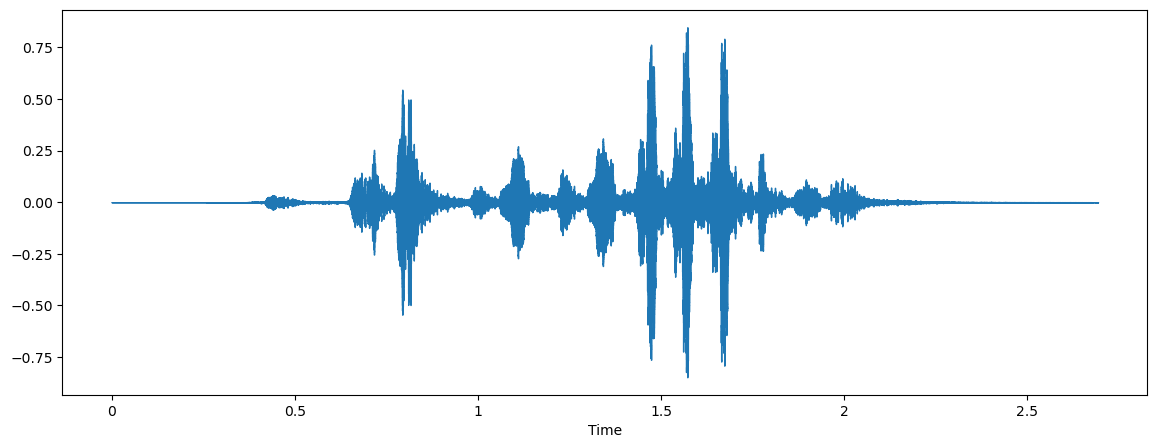

**Spectrogram**  

A spectrogram is a visual way of representing the signal strength, or ‚Äúloudness‚Äù, of a signal over time at various frequencies present in a particular waveform. Using librosa dispaly the spectrogram of audio signal you loaded in the previous step. 

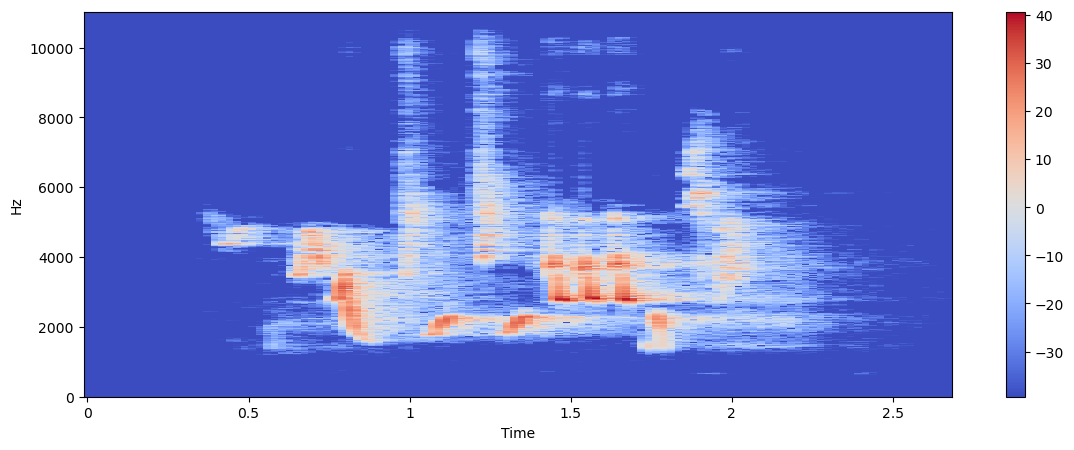

‚ùì Now similar to the begining of this task, create an audio signalwith `sr` of 22.05 KHz for the duration of 5`s` using `librosa`, and save the file as `sample_audio_220.wav`. 


## Feature Extraction

‚ùì  What are the spectral features and name a few:

Your answer: 

<details>
    <summary>üí° <strong>hint!</strong></summary>
Spectral bandwidth, Spectral centriod, Spectral rolloff, zero-crossing rate, Mel-frequency capstral coefficients (MFCCs), and chroma 
</details>

#### Spectral bandwith

In [47]:
#TODO

/tmp/ipykernel_1877161/1715131974.py:5: FutureWarning: Pass y=[0.01       0.01       0.01       ... 0.0099999  0.01000007 0.01      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(sig+0.01, sr=sr)[0]
/tmp/ipykernel_1877161/1715131974.py:6: FutureWarning: Pass y=[0.01       0.01       0.01       ... 0.0099999  0.01000007 0.01      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(sig+0.01, sr=sr, p=3)[0]
/tmp/ipykernel_1877161/1715131974.py:7: FutureWarning: Pass y=[0.01       0.01       0.01       ... 0.0099999  0.01000007 0.01      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(sig+0.01, sr=sr, p=4)[0]


<Figure size 1200x400 with 0 Axes>

#### Mel-Frequency Cepstral Coefficients(MFCCs)

In [51]:
#TODO

(20, 116)


/tmp/ipykernel_1877161/3171253403.py:1: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.0091948e-07
  7.2644461e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(sig, sr=sr)


# Bonus

## Music genre classification using ANN

This part is a bonus task, so first make sure you have finished the above tasks.  

For the fianl part, let's use a dataset consist of 1000 audio tracks (each 30 s long). The dataset contain the tracks in 10 different genres, and the dataset is balanced. The tracks are all 22050 Hz monophonic 16-bit audio files in .wav format. Download the dataset from [here](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification)

<details>
    <summary>üí° <strong>hint!</strong></summary>
you may try to convert the audios into png files (the trick is to use spectrogram). Then it would be easier to extract the features (those you have already calculated in the previous section, bandwith, MFCC, and ...). 
</details>

After preprocessing and feature extraction, use a ANN model to calssify the dataset according to their genre. you can use a simple MLP with input layer of 256 neurons, 2 hidden layers of 128 and 64 neurons, and the output layer. And for the metrics reporting `accuracy` is enough. 